<h1>Complex plotting techniques</h1>

<b><i>Contour plot</i></b>

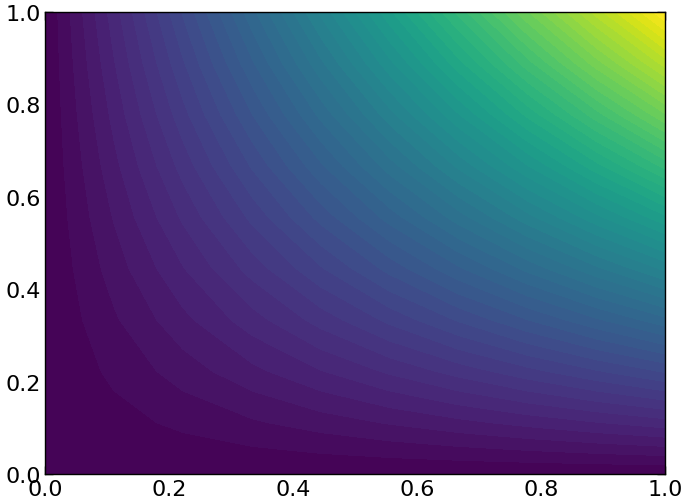

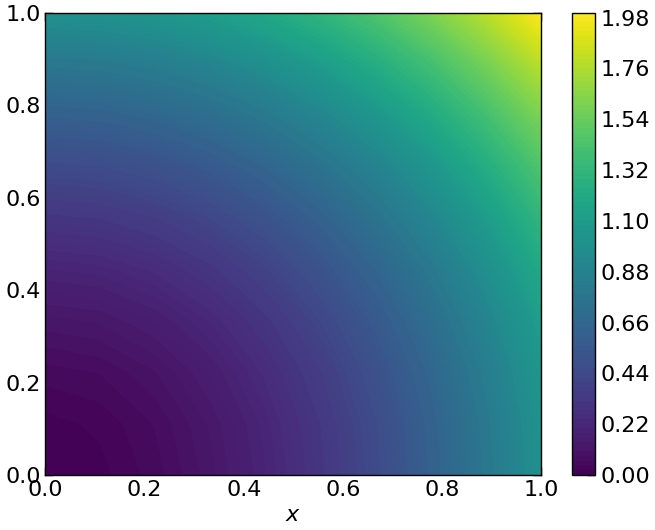

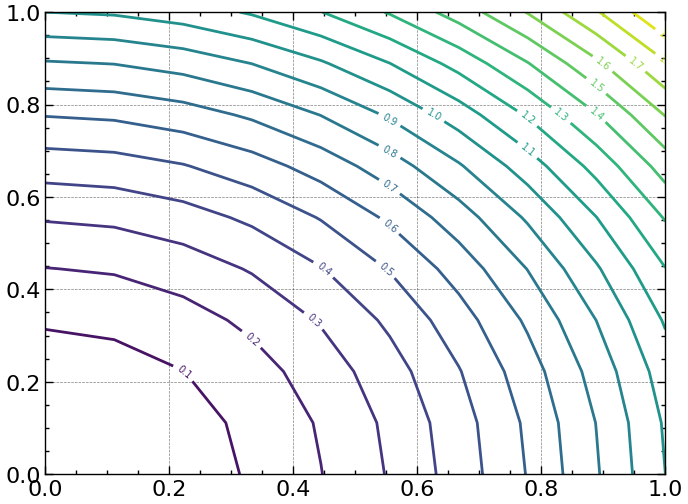

In [1]:
import numpy as np

nx, ny = (10, 10)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)

xv, yv = np.meshgrid(x,y,) # Cartesian product between x and y

import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

# plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()
plt.contourf(xv, yv, xv*yv, levels=50)
plt.show()
plt.contourf(xv, yv, xv**2+yv**2, levels=100)
plt.xlabel('$x$')
plt.colorbar()
plt.show()
cnt = plt.contour(xv, yv, xv**2+yv**2, levels=20)
plt.clabel(cnt, fontsize=7)
plt.show()


<b><i>3D surface plot</i></b>

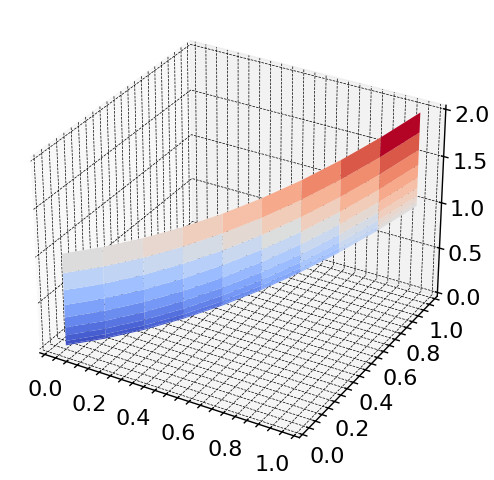

In [2]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(x, y, xv**2+yv**2, cmap='coolwarm')

<b><i>Streamplot</i></b>

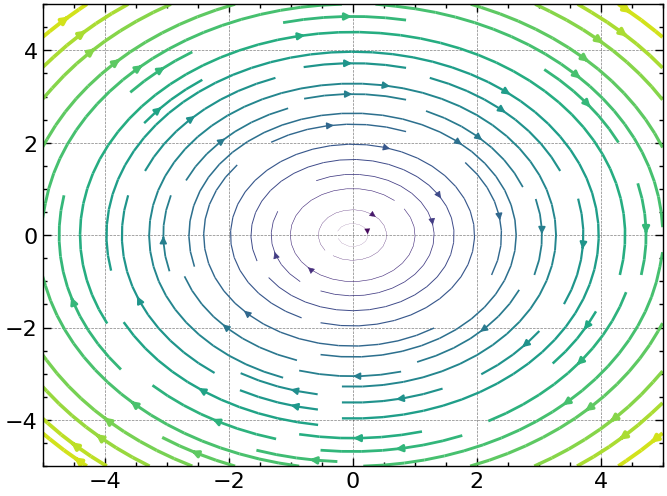

In [8]:
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])
import numpy as np
T = np.linspace(-5,5,100)
X,Y = np.meshgrid(T,T)

#   Vector field for circle ODE
P = Y
Q = -X

#Vector field orthogonal to circle - defines straight lines
# P = X
# Q = Y


#   Constant fields
# P = np.ones(X.shape)
# Q = np.zeros(X.shape)

magn = np.sqrt(P**2 + Q**2)
line_width = 3*magn/magn.max()
seedpts = np.array([[1,0],[1,1]])

plt.streamplot(X,Y, P,Q, color=magn, linewidth=line_width)

# plt.streamplot(X,Y, P,Q, color=magn, linewidth=line_width, start_points=seedpts)
plt.savefig('images/circles.png', dpi=200)


<b><i>Animations</i></b>

In [4]:
from matplotlib import animation
from matplotlib.animation import PillowWriter


def f(x,t):
    return np.sin(x-3*t)

x = np.linspace(0, 10*np.pi, 1000)

fig, ax = plt.subplots(1, 1)
ln1, = plt.plot([], [])
time_text = ax.text(0.65, 0.95, 'text', fontsize=15,
                    transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
ax.set_xlim(0,10*np.pi)
ax.set_ylim(-1.5,1.5)

def animate(i):
    """
        Function of a frame number
    """

    ln1.set_data(x, f(x,i/20)) # If 20 fps, i/20 increments by 1 every second
    time_text.set_text(f't={i/20:.2f}')


ani = animation.FuncAnimation(fig, animate, frames=int(np.floor(2*np.pi*20))) # #
ani.save('images/ani.gif', writer='pillow', dpi=100, fps=100) # 

<b><i>3D rotation animation</i></b>

In [ ]:
plt.style.use(['default'])

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xv, yv = np.meshgrid(x,y)

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(xv, yv, xv**2+yv**2, cmap='coolwarm')
ax.view_init(elev=10, azim=0)

def animate(i):
    """
        Function of a frame number
    """
    ax.view_init(elev=10, azim=i)
    

ani = animation.FuncAnimation(fig, animate, frames=360)
ani.save('images/ani3D.gif', writer='pillow', dpi=200, fps=30)

<b><i>Quiver plot</i></b>

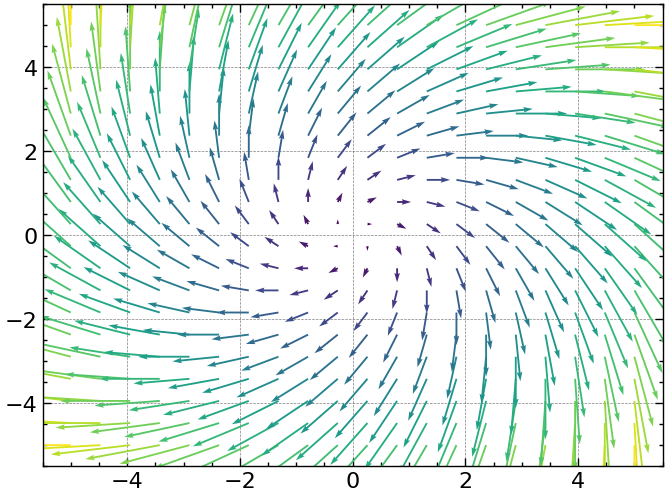

In [7]:
plt.style.use(['science', 'notebook', 'grid'])

T = np.linspace(-5,5,20)
X,Y = np.meshgrid(T,T)

"""
    Having the DE with explicit derivative y' = f(x,y)
    it is possible to  plot the directional field with <P, Q> s.t.
    tan(angle) = Q/P = f(x,y)
"""

#   Vector field for circle ODE
P = Y
Q = -X

#Vector field orthogonal to circle - defines straight lines
# P = X
# Q = Y

#   Constant fields
# P = np.ones(X.shape)
# Q = np.zeros(X.shape)

#   Exact DE
# P = np.ones(X.shape)
# Q = Y*(2+np.log(Y)/X)

# Nonlinear DE
# P = np.ones(X.shape)
# Q = 3*np.cbrt(Y**2)

# Spiral DE
# P = -X + Y
# Q = -X - Y

# Orthogonal to Spiral DE
P = -(-X - Y)
Q = -X + Y

magn = np.sqrt(P**2 + Q**2)

plt.quiver(X, Y, P, Q, magn, scale=70)


plt.savefig('images/spiral.png', dpi=200)


<b><i>3D Quiver plot</i></b>

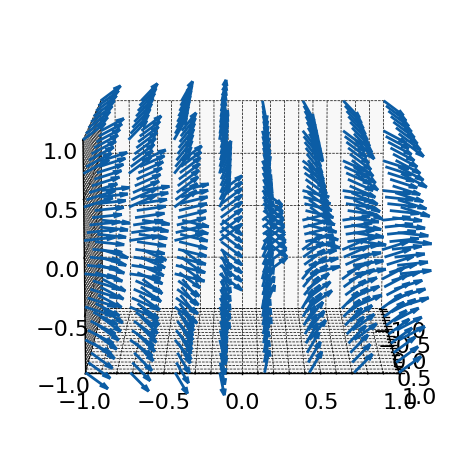

In [8]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

T = np.linspace(-1,1,8)
X,Y,Z = np.meshgrid(T,T,T)


fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

quiver = ax.quiver([],[],[],[],[],[])
ax.view_init(elev=0, azim=0)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

def animate(i):
    # R = np.cos(i)
    # P = np.sin(i)
    # Q = -X/Y*np.sin(i) - Z/Y*np.cos(i)

    # Tangents to sphere
    # P = Z*np.sin(i)
    # Q = Z*np.cos(i)
    # R = -X*np.sin(i) - Y*np.cos(i)

    # Tangents to paraboloid
    # P = np.sin(i)
    # Q = np.cos(i)
    # R = 2*X*np.sin(i) + 2*Y*np.cos(i)

    # Tangents parabola
    # P = np.sin(i)
    # Q = np.cos(i)
    # R = 2*X*np.sin(i)

    # Tangents ? hyperbola xyz=k
    P = np.sin(i)
    Q = np.cos(i)
    R = -Z/X*np.sin(i) - Z/Y*np.cos(i)

    global quiver
    quiver.remove()
    quiver = ax.quiver(X,Y,Z, P,Q,R, normalize=True, length=0.2)
    ax.view_init(elev=10, azim=20/np.pi*i)

ani = animation.FuncAnimation(fig, animate, frames=np.linspace(0,2*np.pi,100))
ani.save('images/ani3D_quiver.gif', writer='pillow', dpi=200, fps=30)

